```{contents}
```

## Polynomial Regression

Polynomial Regression is an extension of **Linear Regression** where instead of fitting a straight line, we fit a **curved line (polynomial curve)** to capture **non-linear relationships** between the independent variable(s) and the target.

👉 While Linear Regression assumes the relationship is:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Polynomial Regression allows higher-degree terms:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_d x^d + \epsilon
$$

Here:

* $d$ = degree of polynomial (2 for quadratic, 3 for cubic, etc.)
* The higher the degree, the more flexible (but also more prone to overfitting).

---

### Intuition

* Imagine your dataset looks like a **curve (U-shape, S-shape, wave-like)**.
* A straight line (Linear Regression) cannot capture this curvature well → it will have **large errors**.
* Polynomial Regression **adds powers of x** ($x^2, x^3, ...$) as extra features, allowing the model to bend and better follow the data.

Think of it as **Linear Regression on transformed features**:

$$
X = [1, x, x^2, x^3, ..., x^d]
$$

---

### Steps to Perform Polynomial Regression

1. **Prepare data** (independent variable $x$, target variable $y$).
2. **Transform features** – generate polynomial features (e.g., $x^2, x^3$).
3. **Apply Linear Regression** on these new features.
4. **Fit and evaluate** the curve.

---

### Visualization

Here’s how Polynomial Regression works compared to Linear Regression:

* **Linear Regression (degree 1):** Straight line
* **Polynomial Regression (degree 2 or higher):** Curve fits the dataset

📊 Imagine points shaped like a parabola (U-shaped).

* Linear Regression → draws a straight line (bad fit).
* Polynomial Regression (degree 2) → draws a U-shape curve (good fit).

---

### Advantages

✅ Can model non-linear relationships
✅ Easy to implement (just transform features, then use Linear Regression)
✅ Often improves accuracy over simple linear models

---

### Disadvantages

⚠️ Higher-degree polynomials → risk of **overfitting**
⚠️ Becomes computationally expensive as degree grows
⚠️ Extrapolation (predicting outside data range) is very unreliable

---

###Example (Quadratic Regression)

Suppose house prices grow with square footage but with a curve (diminishing returns).

Equation could look like:

$$
Price = \beta_0 + \beta_1 \cdot Size + \beta_2 \cdot Size^2
$$

* Small homes → price grows fast
* Large homes → price growth slows down
* A quadratic curve captures this better than a straight line.

---

📌 Would you like me to **generate Python code with plots** to show:

1. Linear Regression line (bad fit)
2. Polynomial Regression curves (degree 2, degree 3) for the same dataset

That way you’ll see how the curve improves as degree increases.


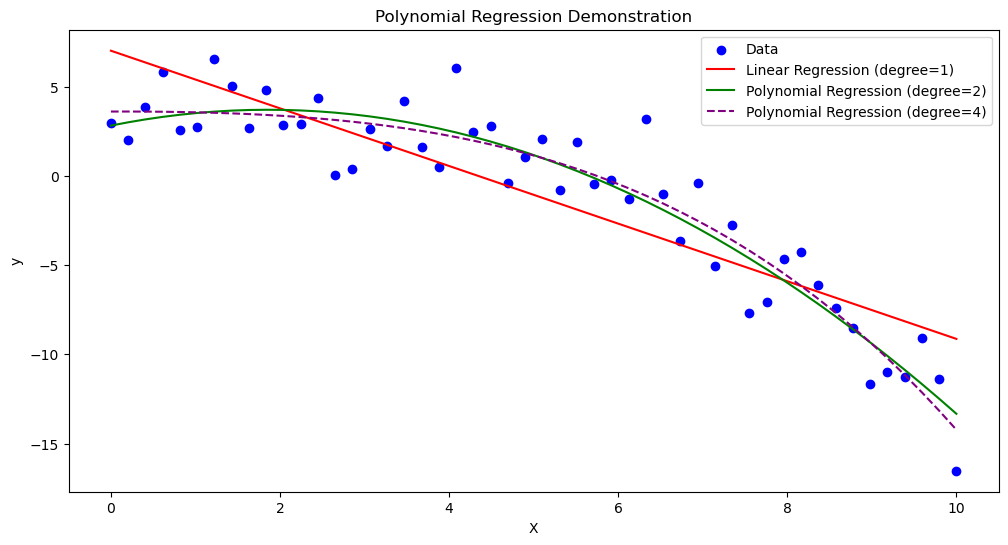

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate sample data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2 + 1.5 * X - 0.3 * X**2 + np.random.normal(0, 2, size=X.shape)

# Linear Regression (degree=1)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_linear = lin_reg.predict(X)

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

# Polynomial Regression (degree=4 for overfitting demo)
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X)
poly_reg4 = LinearRegression()
poly_reg4.fit(X_poly4, y)
y_pred_poly4 = poly_reg4.predict(X_poly4)

# Plot results
plt.figure(figsize=(12, 6))

# Scatter points
plt.scatter(X, y, color="blue", label="Data")

# Plot Linear Regression
plt.plot(X, y_pred_linear, color="red", label="Linear Regression (degree=1)")

# Plot Polynomial Regression (degree=2)
plt.plot(X, y_pred_poly, color="green", label="Polynomial Regression (degree=2)")

# Plot Polynomial Regression (degree=4)
plt.plot(X, y_pred_poly4, color="purple", linestyle="--", label="Polynomial Regression (degree=4)")

# Labels
plt.title("Polynomial Regression Demonstration")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
